# 画像の相互相関を見る

In [1]:
#import
import sys
import os
import glob
import math
import itertools

import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

sys.path.append('../')
from pyopt import modulate as md

# 1. PRBS信号の自己相関を見る

In [2]:
N = 7  # PRBSの次数
itr = 1  # PRBSの繰り返し回数
form = 'RZ16QAM'  # 変調方式
n = 32  # 1シンボルあたりのサンプリング数[/symbol]
equalize = False  # 各シンボル数を均等にするか

bitsq = md.prbs(N=N, itr=itr)

In [3]:
correlation = [0] * len(bitsq)
for i in tqdm(range(len(bitsq))):
    xor = 0
    for j in range(len(bitsq)):
        if j + i < len(bitsq):
            xor += bitsq[j] ^ bitsq[j + i]
        else:
            xor += bitsq[j] ^ bitsq[j + i - len(bitsq)]
    if i < len(bitsq) // 2:
        correlation[len(bitsq) // 2 + i] = 1 - xor / len(bitsq)
    else:
        correlation[i - len(bitsq) // 2] = 1 - xor / len(bitsq)

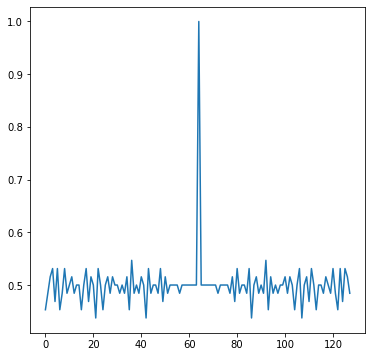

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(correlation);

# 2. 画像

In [2]:
def load_image(target_dir, image_number):
    image_dir = '../data/image/'
    image_path_list = sorted(glob.glob(os.path.join(image_dir + target_dir, '*.jpg')))
    image_path = image_path_list[image_number]
    img = Image.open(image_path)
    return img

In [3]:
def image_correlation(img_array0, img_array1):
    correlation = np.zeros((img_array0.shape[0], img_array0.shape[1]), dtype=float)
    for i in range(img_array0.shape[0]):
        for j in range(img_array0.shape[1]):
            xor = 0
            for k in range(3):
                xor += bin(img_array0[i, j, k] ^ img_array1[i, j, k]).count('1')
            correlation[i, j] = 1 - xor / 24
    return correlation

## 2.1 画像の自己相関を見る

(683, 1024, 3)


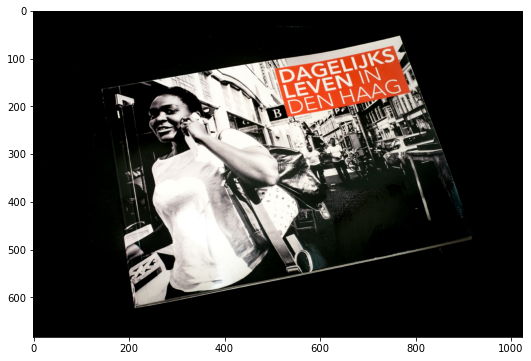

In [4]:
target_dir = 'train'
image_number = 9

img = load_image(target_dir, image_number)
img_array = np.array(img)
print(img_array.shape)

fig = plt.figure(figsize=(9, 6))
plt.imshow(img);

In [8]:
corr = image_correlation(img_array, img_array)
print(corr)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## 2.2 画像の相互相関を見る

(685, 1024, 3)
(768, 1024, 3)


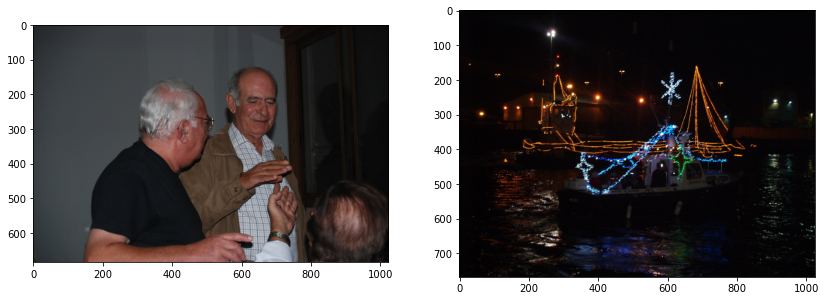

In [9]:
target_dir = 'train_0'
image_number0 = 4
image_number1 = 8

img0 = load_image(target_dir, image_number0)
img_array0 = np.array(img0)
print(img_array0.shape)
img1 = load_image(target_dir, image_number1)
img_array1 = np.array(img1)
print(img_array1.shape)

fig = plt.figure(figsize=(14, 6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.imshow(img0)
ax1.imshow(img1);

In [10]:
corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
print(corr)
print(np.mean(corr))

[[0.66666667 0.58333333 0.79166667 ... 0.91666667 0.875      0.75      ]
 [0.625      0.54166667 0.625      ... 0.83333333 0.70833333 0.79166667]
 [0.70833333 0.66666667 0.66666667 ... 0.70833333 0.70833333 0.83333333]
 ...
 [0.54166667 0.625      0.625      ... 0.75       0.70833333 0.70833333]
 [0.625      0.625      0.5        ... 0.58333333 0.75       0.625     ]
 [0.58333333 0.5        0.58333333 ... 0.66666667 0.70833333 0.66666667]]
0.5950105616065998


## 2.3 画像の相互相関の分布を見る

In [33]:
target_dir = 'train_0'
corrs = []
num = 100
for nums in tqdm(itertools.combinations([i for i in range(num)], 2), total=num*(num-1)//2):
    img0 = load_image(target_dir, nums[0])
    img_array0 = np.array(img0)
    img1 = load_image(target_dir, nums[1])
    img_array1 = np.array(img1)
    if img_array0.ndim != 3 or img_array1.ndim != 3:
        continue
    corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
    corr_mean = np.mean(corr)
    if corr_mean < 0.46 or corr_mean > 0.54:
        print(corr_mean, nums[0], 'and', nums[1])
    corrs.append(corr_mean)

0.571510255798813 2 and 8
0.5541200465318149 2 and 15
0.5400530198248041 2 and 51
0.5425346170798342 2 and 67
0.5415898779325139 2 and 77
0.5575117768091615 2 and 92
0.5532347213390264 2 and 97
0.5950105616065998 4 and 8
0.5508395229812956 4 and 15
0.5413095223588382 4 and 19
0.4313209849262468 4 and 31
0.5403992144730839 4 and 32
0.5621718060941303 4 and 51
0.4567452906402069 4 and 58
0.5442040659215327 4 and 63
0.5547654844016899 4 and 69
0.42327972931873475 4 and 71
0.5471507352941178 4 and 73
0.5444280694000911 4 and 78
0.5424703704759731 4 and 83
0.5476287559226706 4 and 84
0.5781949750988443 4 and 92
0.5606963294555962 4 and 97
0.5588586551626935 4 and 99
0.568381980613426 8 and 11
0.5466599322459126 8 and 14
0.6028013759189182 8 and 15
0.5865888133868948 8 and 19
0.5491704332806805 8 and 20
0.5694314462167245 8 and 22
0.5561817475479017 8 and 24
0.5576946357216933 8 and 28
0.36675326029459643 8 and 31
0.5550386823296837 8 and 32
0.5561439196268718 8 and 36
0.5450399186876084 8 a

(array([  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,
          1.,   1.,   3.,   1.,   3.,   1.,   1.,   3.,   6.,   3.,   9.,
         17.,  12.,  18.,  26.,  37.,  61.,  64., 102., 162., 217., 292.,
        414., 549., 507., 428., 384., 313., 223., 202., 155., 136., 100.,
         76.,  46.,  44.,  30.,  28.,  18.,  19.,   8.,   5.,   2.,   5.,
          2.,   2.,   1.,   0.,   3.,   1.,   0.,   1.,   0.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.34675326, 0.35013806, 0.35352286, 0.35690766, 0.36029246,
        0.36367726, 0.36706206, 0.37044686, 0.37383166, 0.37721646,
        0.38060126, 0.38398606, 0.38737085, 0.39075565, 0.39414045,
        0.39752525, 0.40091005, 0.40429485, 0.40767965, 0.41106445,
        0.41444925, 0.41783405, 0.42121885, 0.

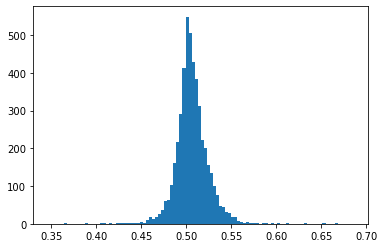

In [44]:
plt.hist(corrs, bins=100, range=(min(corrs)-0.02, max(corrs)+0.02))
#plt.yscale('log');

## 2.4 画像の相互相関の分布を見る(0~9)

In [26]:
target_dir = 'train_0'
corrs = []
num = 10
for nums in tqdm(itertools.combinations([i for i in range(num)], 2), total=num*(num-1)//2):
    img0 = load_image(target_dir, nums[0])
    img_array0 = np.array(img0)
    img1 = load_image(target_dir, nums[1])
    img_array1 = np.array(img1)
    if img_array0.ndim != 3 or img_array1.ndim != 3:
        continue
    corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
    corr_mean = np.mean(corr)
    if corr_mean < 0.46 or corr_mean > 0.54:
        print(corr_mean, nums[0], 'and', nums[1])
    corrs.append(corr_mean)

0.571510255798813 2 and 8
0.5950105616065998 4 and 8



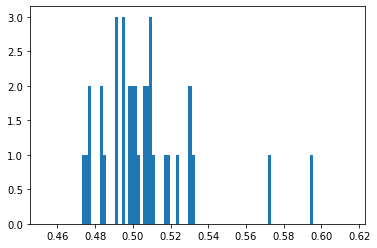

In [6]:
plt.hist(corrs, bins=100, range=(min(corrs)-0.02, max(corrs)+0.02));

## 2.5 画像の相互相関が0.5付近の組み合わせを取り出す

In [12]:
target_dir = 'train_0'
image_idxs = []
k = 0
while len(image_idxs) < 100:
    img0 = load_image(target_dir, k)
    img_array0 = np.array(img0)
    flag = True
    for i in range(len(image_idxs)):
        img1 = load_image(target_dir, image_idxs[i])
        img_array1 = np.array(img1)
        if img_array0.ndim != 3 or img_array1.ndim != 3:
            continue
        corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
        corr_mean = np.mean(corr)
        if not 0.495 < corr_mean < 0.505:
            flag = False
    if flag:
        image_idxs.append(k)
    k += 1
    print('[', k, ',', len(image_idxs), ']', end=' ')

[ 1 , 1 ] [ 2 , 1 ] [ 3 , 1 ] [ 4 , 1 ] [ 5 , 1 ] [ 6 , 2 ] [ 7 , 3 ] [ 8 , 3 ] [ 9 , 3 ] [ 10 , 3 ] [ 11 , 3 ] [ 12 , 3 ] [ 13 , 4 ] [ 14 , 4 ] [ 15 , 4 ] [ 16 , 4 ] [ 17 , 4 ] [ 18 , 5 ] [ 19 , 5 ] [ 20 , 5 ] [ 21 , 5 ] [ 22 , 5 ] [ 23 , 5 ] [ 24 , 5 ] [ 25 , 5 ] [ 26 , 5 ] [ 27 , 5 ] [ 28 , 5 ] [ 29 , 5 ] [ 30 , 5 ] [ 31 , 5 ] [ 32 , 5 ] [ 33 , 5 ] [ 34 , 6 ] [ 35 , 6 ] [ 36 , 7 ] [ 37 , 7 ] [ 38 , 7 ] [ 39 , 7 ] [ 40 , 7 ] [ 41 , 7 ] [ 42 , 7 ] [ 43 , 7 ] [ 44 , 7 ] [ 45 , 7 ] [ 46 , 8 ] [ 47 , 8 ] [ 48 , 8 ] [ 49 , 8 ] [ 50 , 8 ] [ 51 , 8 ] [ 52 , 8 ] [ 53 , 9 ] [ 54 , 10 ] [ 55 , 10 ] [ 56 , 10 ] [ 57 , 10 ] [ 58 , 10 ] [ 59 , 10 ] [ 60 , 10 ] [ 61 , 10 ] [ 62 , 10 ] [ 63 , 10 ] [ 64 , 10 ] [ 65 , 10 ] [ 66 , 10 ] [ 67 , 10 ] [ 68 , 10 ] [ 69 , 10 ] [ 70 , 10 ] [ 71 , 10 ] [ 72 , 10 ] [ 73 , 10 ] [ 74 , 10 ] [ 75 , 10 ] [ 76 , 10 ] [ 77 , 10 ] [ 78 , 10 ] [ 79 , 10 ] [ 80 , 10 ] [ 81 , 10 ] [ 82 , 10 ] [ 83 , 10 ] [ 84 , 10 ] [ 85 , 10 ] [ 86 , 10 ] [ 87 , 10 ] [ 88 , 10 ] [ 89 ,

[ 644 , 27 ] [ 645 , 27 ] [ 646 , 27 ] [ 647 , 27 ] [ 648 , 27 ] [ 649 , 27 ] [ 650 , 27 ] [ 651 , 27 ] [ 652 , 27 ] [ 653 , 27 ] [ 654 , 27 ] [ 655 , 28 ] [ 656 , 28 ] [ 657 , 28 ] [ 658 , 28 ] [ 659 , 28 ] [ 660 , 28 ] [ 661 , 28 ] [ 662 , 28 ] [ 663 , 28 ] [ 664 , 28 ] [ 665 , 28 ] [ 666 , 28 ] [ 667 , 28 ] [ 668 , 28 ] [ 669 , 28 ] [ 670 , 28 ] [ 671 , 29 ] [ 672 , 29 ] [ 673 , 29 ] [ 674 , 29 ] [ 675 , 29 ] [ 676 , 29 ] [ 677 , 29 ] [ 678 , 29 ] [ 679 , 29 ] [ 680 , 29 ] [ 681 , 29 ] [ 682 , 29 ] [ 683 , 29 ] [ 684 , 29 ] [ 685 , 29 ] [ 686 , 29 ] [ 687 , 29 ] [ 688 , 29 ] [ 689 , 29 ] [ 690 , 29 ] [ 691 , 29 ] [ 692 , 29 ] [ 693 , 29 ] [ 694 , 29 ] [ 695 , 29 ] [ 696 , 29 ] [ 697 , 29 ] [ 698 , 29 ] [ 699 , 29 ] [ 700 , 29 ] [ 701 , 29 ] [ 702 , 29 ] [ 703 , 29 ] [ 704 , 29 ] [ 705 , 29 ] [ 706 , 29 ] [ 707 , 29 ] [ 708 , 29 ] [ 709 , 29 ] [ 710 , 29 ] [ 711 , 29 ] [ 712 , 29 ] [ 713 , 29 ] [ 714 , 29 ] [ 715 , 29 ] [ 716 , 29 ] [ 717 , 29 ] [ 718 , 29 ] [ 719 , 29 ] [ 720 , 29 ]

[ 1255 , 48 ] [ 1256 , 48 ] [ 1257 , 48 ] [ 1258 , 48 ] [ 1259 , 48 ] [ 1260 , 48 ] [ 1261 , 48 ] [ 1262 , 48 ] [ 1263 , 48 ] [ 1264 , 48 ] [ 1265 , 48 ] [ 1266 , 48 ] [ 1267 , 48 ] [ 1268 , 48 ] [ 1269 , 48 ] [ 1270 , 48 ] [ 1271 , 48 ] [ 1272 , 48 ] [ 1273 , 48 ] [ 1274 , 48 ] [ 1275 , 48 ] [ 1276 , 48 ] [ 1277 , 48 ] [ 1278 , 48 ] [ 1279 , 48 ] [ 1280 , 48 ] [ 1281 , 48 ] [ 1282 , 48 ] [ 1283 , 48 ] [ 1284 , 48 ] [ 1285 , 48 ] [ 1286 , 48 ] [ 1287 , 48 ] [ 1288 , 48 ] [ 1289 , 48 ] [ 1290 , 48 ] [ 1291 , 48 ] [ 1292 , 48 ] [ 1293 , 48 ] [ 1294 , 48 ] [ 1295 , 48 ] [ 1296 , 48 ] [ 1297 , 48 ] [ 1298 , 48 ] [ 1299 , 48 ] [ 1300 , 48 ] [ 1301 , 48 ] [ 1302 , 48 ] [ 1303 , 49 ] [ 1304 , 49 ] [ 1305 , 49 ] [ 1306 , 49 ] [ 1307 , 49 ] [ 1308 , 49 ] [ 1309 , 49 ] [ 1310 , 49 ] [ 1311 , 49 ] [ 1312 , 49 ] [ 1313 , 49 ] [ 1314 , 49 ] [ 1315 , 49 ] [ 1316 , 49 ] [ 1317 , 49 ] [ 1318 , 49 ] [ 1319 , 49 ] [ 1320 , 49 ] [ 1321 , 49 ] [ 1322 , 49 ] [ 1323 , 49 ] [ 1324 , 49 ] [ 1325 , 49 ] [ 1326

[ 1841 , 62 ] [ 1842 , 62 ] [ 1843 , 62 ] [ 1844 , 62 ] [ 1845 , 62 ] [ 1846 , 63 ] [ 1847 , 63 ] [ 1848 , 63 ] [ 1849 , 63 ] [ 1850 , 63 ] [ 1851 , 63 ] [ 1852 , 63 ] [ 1853 , 63 ] [ 1854 , 63 ] [ 1855 , 63 ] [ 1856 , 63 ] [ 1857 , 63 ] [ 1858 , 63 ] [ 1859 , 63 ] [ 1860 , 63 ] [ 1861 , 63 ] [ 1862 , 63 ] [ 1863 , 63 ] [ 1864 , 63 ] [ 1865 , 63 ] [ 1866 , 63 ] [ 1867 , 63 ] [ 1868 , 63 ] [ 1869 , 63 ] [ 1870 , 63 ] [ 1871 , 63 ] [ 1872 , 63 ] [ 1873 , 63 ] [ 1874 , 63 ] [ 1875 , 63 ] [ 1876 , 63 ] [ 1877 , 63 ] [ 1878 , 63 ] [ 1879 , 63 ] [ 1880 , 63 ] [ 1881 , 63 ] [ 1882 , 63 ] [ 1883 , 63 ] [ 1884 , 63 ] [ 1885 , 63 ] [ 1886 , 63 ] [ 1887 , 63 ] [ 1888 , 63 ] [ 1889 , 63 ] [ 1890 , 63 ] [ 1891 , 63 ] [ 1892 , 63 ] [ 1893 , 63 ] [ 1894 , 63 ] [ 1895 , 63 ] [ 1896 , 63 ] [ 1897 , 63 ] [ 1898 , 63 ] [ 1899 , 63 ] [ 1900 , 64 ] [ 1901 , 65 ] [ 1902 , 65 ] [ 1903 , 65 ] [ 1904 , 65 ] [ 1905 , 65 ] [ 1906 , 65 ] [ 1907 , 65 ] [ 1908 , 65 ] [ 1909 , 65 ] [ 1910 , 65 ] [ 1911 , 65 ] [ 1912

[ 2427 , 81 ] [ 2428 , 81 ] [ 2429 , 82 ] [ 2430 , 82 ] [ 2431 , 82 ] [ 2432 , 82 ] [ 2433 , 82 ] [ 2434 , 82 ] [ 2435 , 82 ] [ 2436 , 82 ] [ 2437 , 82 ] [ 2438 , 82 ] [ 2439 , 82 ] [ 2440 , 82 ] [ 2441 , 82 ] [ 2442 , 82 ] [ 2443 , 82 ] [ 2444 , 82 ] [ 2445 , 82 ] [ 2446 , 82 ] [ 2447 , 83 ] [ 2448 , 83 ] [ 2449 , 83 ] [ 2450 , 83 ] [ 2451 , 83 ] [ 2452 , 83 ] [ 2453 , 83 ] [ 2454 , 83 ] [ 2455 , 83 ] [ 2456 , 83 ] [ 2457 , 83 ] [ 2458 , 83 ] [ 2459 , 83 ] [ 2460 , 84 ] [ 2461 , 84 ] [ 2462 , 84 ] [ 2463 , 84 ] [ 2464 , 84 ] [ 2465 , 84 ] [ 2466 , 85 ] [ 2467 , 85 ] [ 2468 , 85 ] [ 2469 , 85 ] [ 2470 , 85 ] [ 2471 , 85 ] [ 2472 , 85 ] [ 2473 , 85 ] [ 2474 , 85 ] [ 2475 , 86 ] [ 2476 , 86 ] [ 2477 , 86 ] [ 2478 , 86 ] [ 2479 , 87 ] [ 2480 , 87 ] [ 2481 , 87 ] [ 2482 , 87 ] [ 2483 , 87 ] [ 2484 , 87 ] [ 2485 , 87 ] [ 2486 , 87 ] [ 2487 , 87 ] [ 2488 , 87 ] [ 2489 , 87 ] [ 2490 , 87 ] [ 2491 , 87 ] [ 2492 , 87 ] [ 2493 , 87 ] [ 2494 , 87 ] [ 2495 , 87 ] [ 2496 , 87 ] [ 2497 , 87 ] [ 2498

In [13]:
print(image_idxs)

[0, 5, 6, 12, 17, 33, 35, 45, 52, 53, 174, 195, 198, 254, 255, 319, 341, 433, 439, 442, 451, 484, 535, 576, 582, 616, 640, 654, 670, 724, 747, 750, 771, 823, 825, 832, 870, 877, 902, 955, 974, 982, 1038, 1077, 1167, 1202, 1204, 1214, 1302, 1361, 1393, 1422, 1437, 1441, 1578, 1621, 1674, 1685, 1762, 1769, 1790, 1814, 1845, 1899, 1900, 1937, 1945, 1962, 2025, 2184, 2191, 2196, 2270, 2276, 2286, 2345, 2348, 2360, 2371, 2375, 2394, 2428, 2446, 2459, 2465, 2474, 2478, 2506, 2523, 2549, 2568, 2594, 2602, 2642, 2648, 2668, 2676, 2696, 2707, 2724]


In [20]:
image_idxs = [0, 5, 6, 12, 17, 33, 35, 45, 52, 53]

target_dir = 'train_0'
corrs = []
num = 10
for nums in tqdm(itertools.combinations(image_idxs, 2), total=num*(num-1)//2):
    img0 = load_image(target_dir, nums[0])
    img_array0 = np.array(img0)
    img1 = load_image(target_dir, nums[1])
    img_array1 = np.array(img1)
    if img_array0.ndim != 3 or img_array1.ndim != 3:
        continue
    corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
    corr_mean = np.mean(corr)
    if corr_mean < 0.46 or corr_mean > 0.54:
        print(corr_mean, nums[0], 'and', nums[1])
    corrs.append(corr_mean)

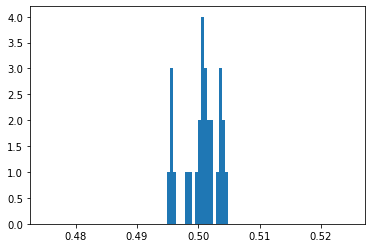

In [21]:
plt.hist(corrs, bins=100, range=(min(corrs)-0.02, max(corrs)+0.02));

## 2.6 画像一覧を表示

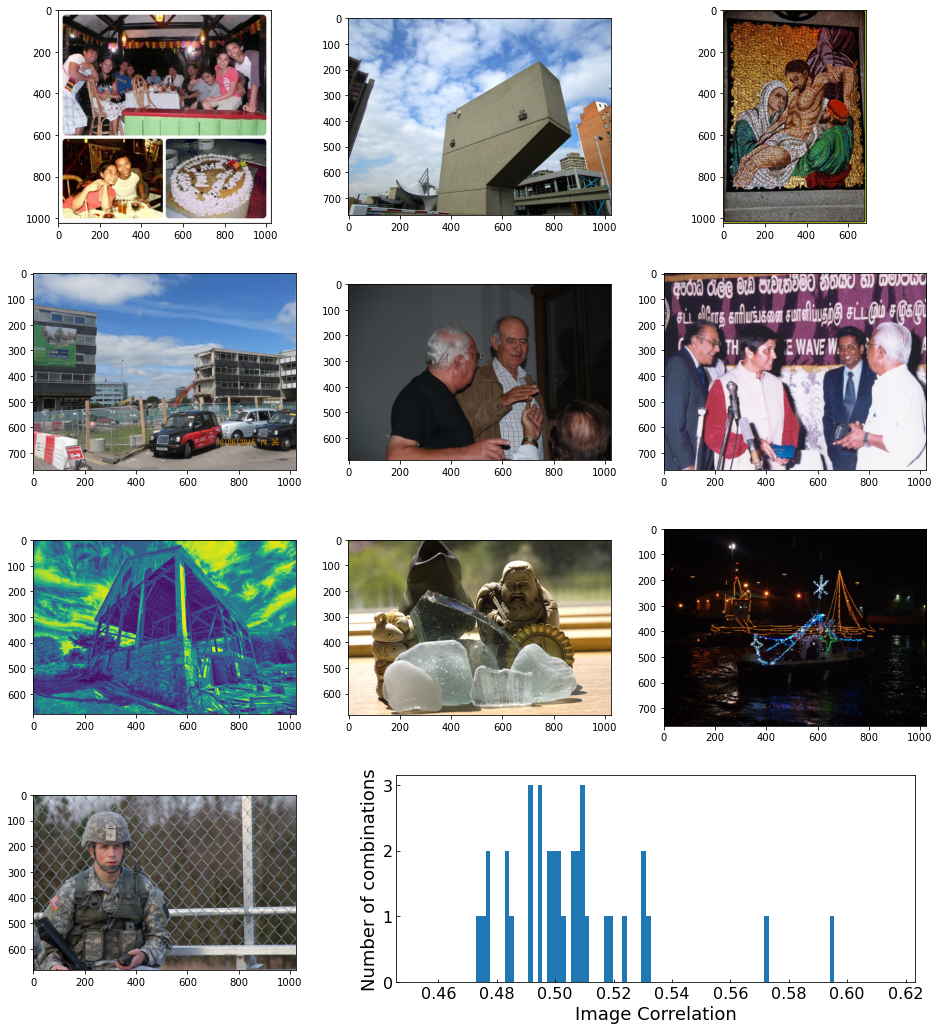

In [27]:
target_dir = 'train_0'
image_nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#image_nums = [0, 5, 6, 12, 17, 33, 35, 45, 52, 53]

cm = plt.get_cmap('rainbow')
fig = plt.figure(figsize=(16, 18))

imgs = []
axs = []
for i in range(10):
    img = load_image(target_dir, image_nums[i])
    ax = fig.add_subplot(4, 3, i + 1)
    ax.imshow(img)

ax = fig.add_subplot(4, 3, (11, 13))
ax.set_position([0.44, 0.13, 0.45, 0.16])
ax.hist(corrs, bins=100, range=(min(corrs)-0.02, max(corrs)+0.02))
ax.set_xlabel('Image Correlation', fontsize=18)
ax.set_ylabel('Number of combinations', fontsize=18)
ax.xaxis.set_tick_params(labelsize= 16, direction='in')
ax.yaxis.set_tick_params(labelsize= 16, direction='in');